In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

---
# Résultatss des varaitions du paramètre `p` de bcl2fastq

In [2]:
bcl2fasq = pd.read_csv("result_bcl2fastq.csv")

In [3]:
bcl2fasq

,type run,param utilisé,temps écoulé (h),temps utilisateur (s),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4,00:00:12.47,38.27,2.11,80.95,2.346448
1,MELISSE,p8,00:00:07.59,40.22,2.96,71.12,2.361540
2,MELISSE,p12,00:00:06.45,40.31,2.90,55.75,2.386592
3,MELISSE,p16,00:00:11.31,60.38,2.24,34.56,2.365040
4,JARVIS,p4,22:23:48,314203.76,2229.52,98.00,38.771068
5,JARVIS,p8,12:02:06,332492.72,3128.93,96.82,42.052904
6,JARVIS,p12,08:40:15,351189.17,3822.08,94.91,45.836560
7,JARVIS,p16,08:49:20,478807.30,2748.00,95.30,54.406524


In [4]:
bcl2fasq["temps cpu"] = bcl2fasq["temps cpu"] + bcl2fasq["temps utilisateur (s)"]
bcl2fasq = bcl2fasq.drop("temps utilisateur (s)", axis=1)
bcl2fasq

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4,00:00:12.47,40.38,80.95,2.346448
1,MELISSE,p8,00:00:07.59,43.18,71.12,2.361540
2,MELISSE,p12,00:00:06.45,43.21,55.75,2.386592
3,MELISSE,p16,00:00:11.31,62.62,34.56,2.365040
4,JARVIS,p4,22:23:48,316433.28,98.00,38.771068
5,JARVIS,p8,12:02:06,335621.65,96.82,42.052904
6,JARVIS,p12,08:40:15,355011.25,94.91,45.836560
7,JARVIS,p16,08:49:20,481555.30,95.30,54.406524


In [5]:
time_melisse = [float(bcl2fasq["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis = [bcl2fasq["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis]

### Graphiques
#### Temps total

In [6]:
def autolabel(rects, pos, labels, height, col="white"):
    """Fonction d'auto-label sur les bar du barplot.
    
    Parameters
    ----------
    rects : BarContainer
        Bar Plot.
    pos : int
        Position sur la figure.
    labels : list or array like
        Liste des labels à ajouter sur les bar du barplot.
    height : float
        Float compris entre 0 et 1 pour choisir la hauteur
        des labels sur le barplot.
    """
    for idx, rect in enumerate(rects):
        ax[pos].text(rect.get_x() + rect.get_width()/2., height*rect.get_height(),
                     round(labels[idx], 2), ha='center', va='top',
                     rotation=0, color=col)
    return


In [7]:
a = bcl2fasq["utilisation cpu (%)"][4:]

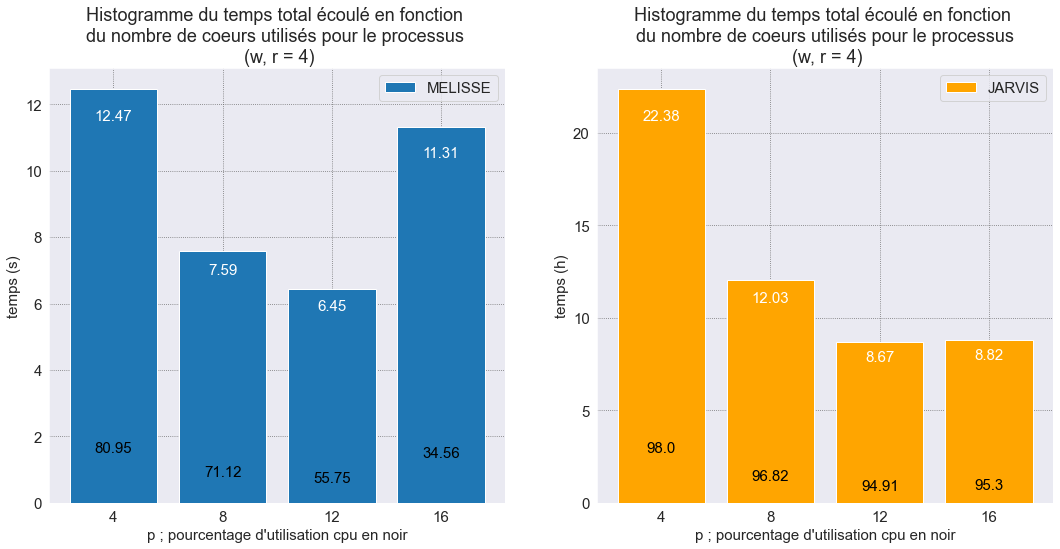

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12", "16"], time_melisse)
ax[0].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus  \n (w, r = 4)")
ax[0].set_xlabel("p ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12", "16"], time_jarvis, color="orange")
ax[1].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus \n (w, r = 4)")
ax[1].set_xlabel("p ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_melisse, 0.95)
autolabel(bar2, 1, time_jarvis, 0.95)
autolabel(bar1, 0, list(bcl2fasq["utilisation cpu (%)"][0:4]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq["utilisation cpu (%)"][4:]), 0.15, col="black")
plt.savefig("img/temps_total1.png", transparent=False);

#### Temps cpu

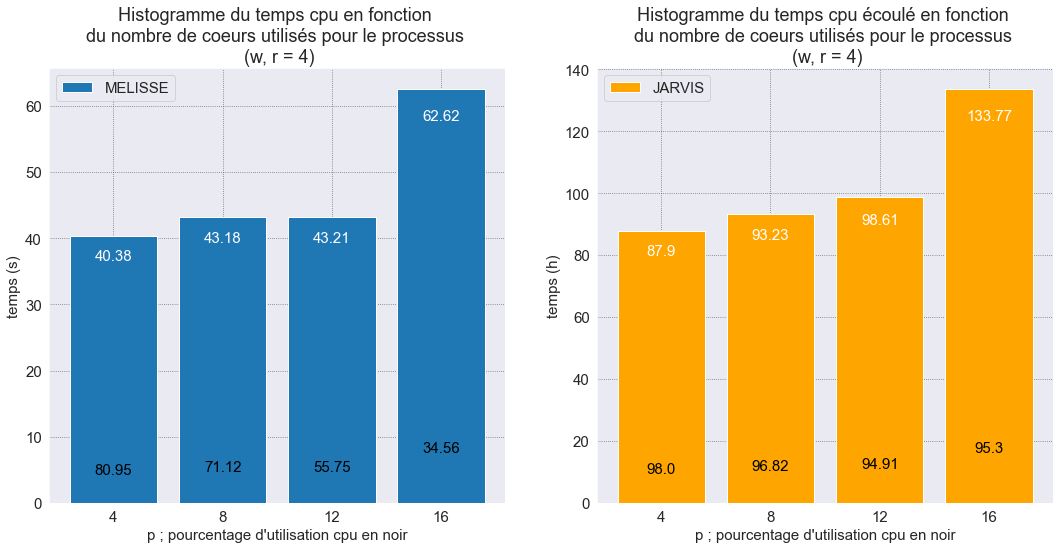

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

time_cpu_m = list(bcl2fasq["temps cpu"][0:4])
time_cpu_j = np.array(bcl2fasq["temps cpu"][4:8])/3600

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12", "16"], time_cpu_m)
ax[0].set_title("Histogramme du temps cpu en fonction \n du nombre de coeurs utilisés pour le processus  \n (w, r = 4)")
ax[0].set_xlabel("p ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12", "16"], time_cpu_j, color="orange")
ax[1].set_title("Histogramme du temps cpu écoulé en fonction \n du nombre de coeurs utilisés pour le processus  \n (w, r = 4)")
ax[1].set_xlabel("p ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_cpu_m, 0.95)
autolabel(bar2, 1, time_cpu_j, 0.95)
autolabel(bar1, 0, list(bcl2fasq["utilisation cpu (%)"][0:4]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq["utilisation cpu (%)"][4:]), 0.15, col="black")
plt.savefig("img/temps_cpu1.png", transparent=False);

---
# Résultatss des varaitions des paramètres `w` et `r` de bcl2fastq

In [10]:
bcl2fasq2 = pd.read_csv("result2_bcl2fastq.csv")

In [11]:
bcl2fasq2

,type run,param utilisé,temps écoulé (h),temps utilisateur (s),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,r4 w4,00:00:08.58,55.72,2.26,56.25,2.360844
1,MELISSE,r8 w8,00:00:18.38,55.74,2.37,26.33,2.354396
2,MELISSE,r12 w12,00:00:07.51,54.40,2.87,63.50,2.359704
3,JARVIS,r4 w4,08:40:15,351189.17,3822.08,94.90,45.836560
4,JARVIS,r8 w8,07:42:28,353271.97,2422.13,95.80,49.550256
5,JARVIS,r12 w12,08:36:00,352413.64,2714.95,95.75,50.125228


In [12]:
bcl2fasq2["temps cpu"] = bcl2fasq2["temps cpu"] + bcl2fasq2["temps utilisateur (s)"]
bcl2fasq2 = bcl2fasq2.drop("temps utilisateur (s)", axis=1)
bcl2fasq2

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,r4 w4,00:00:08.58,57.98,56.25,2.360844
1,MELISSE,r8 w8,00:00:18.38,58.11,26.33,2.354396
2,MELISSE,r12 w12,00:00:07.51,57.27,63.50,2.359704
3,JARVIS,r4 w4,08:40:15,355011.25,94.90,45.836560
4,JARVIS,r8 w8,07:42:28,355694.10,95.80,49.550256
5,JARVIS,r12 w12,08:36:00,355128.59,95.75,50.125228


In [13]:
time_melisse2 = [float(bcl2fasq2["temps écoulé (h)"][i][6:]) for i in range(0, 3)]
time_jarvis2 = [bcl2fasq2["temps écoulé (h)"][i][:] for i in range(3, 6)]
time_jarvis2 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis2]
time2 = time_melisse2 + time_jarvis2

### Graphique
#### Temps total

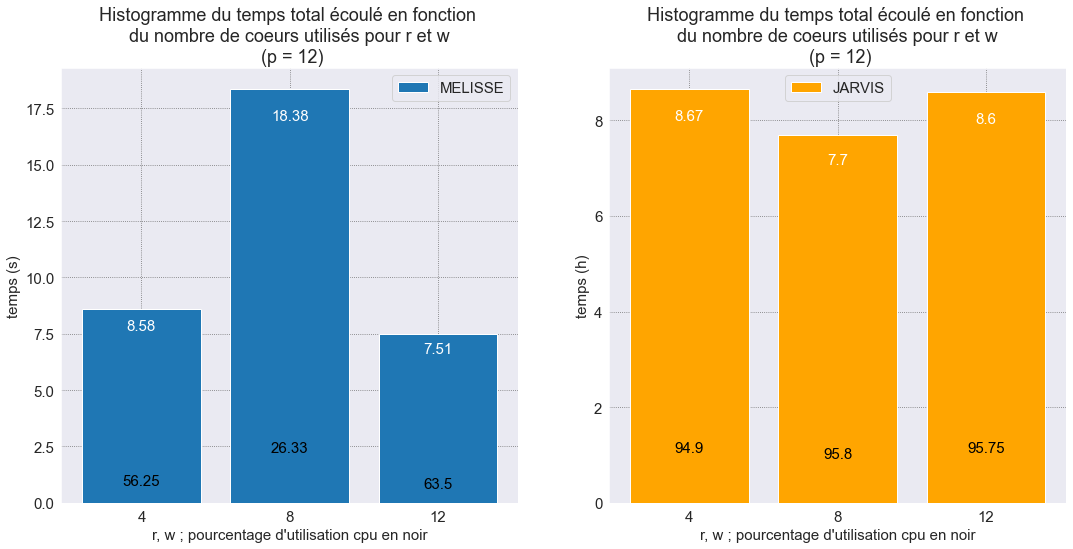

In [14]:
## Graph
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12"], time_melisse2)
ax[0].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour r et w \n (p = 12)")
ax[0].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12"], time_jarvis2, color="orange")
ax[1].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour r et w \n (p = 12)")
ax[1].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_melisse2, 0.95)
autolabel(bar2, 1, time_jarvis2, 0.95)
autolabel(bar1, 0, list(bcl2fasq2["utilisation cpu (%)"][0:3]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq2["utilisation cpu (%)"][3:]), 0.15, col="black")
plt.savefig("img/temps_total2.png", transparent=False);

#### Temps cpu

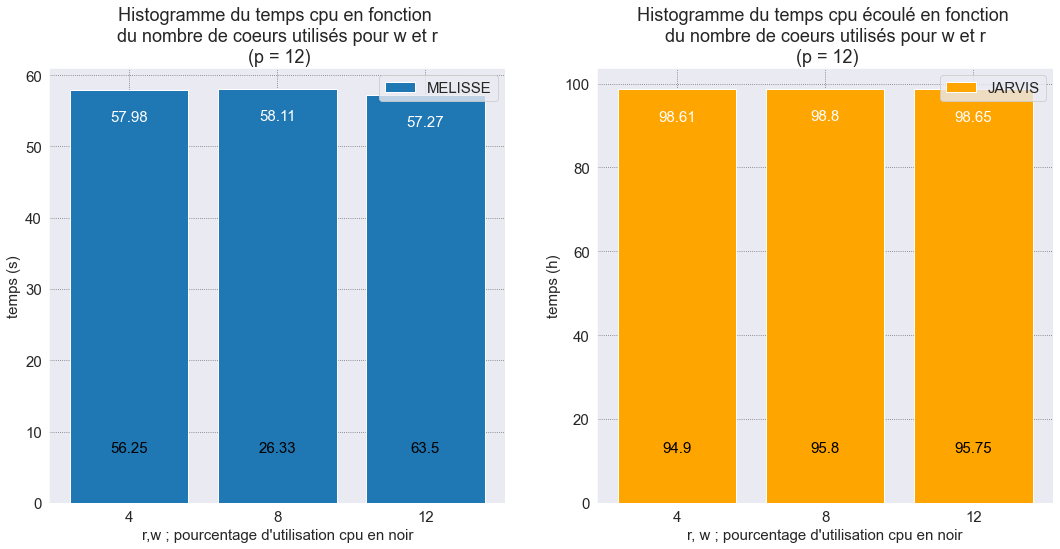

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

time_cpu_m = list(bcl2fasq2["temps cpu"][0:3])
time_cpu_j = np.array(bcl2fasq2["temps cpu"][3:6])/3600

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12"], time_cpu_m)
ax[0].set_title("Histogramme du temps cpu en fonction \n du nombre de coeurs utilisés pour w et r \n (p = 12)")
ax[0].set_xlabel("r,w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12"], time_cpu_j, color="orange")
ax[1].set_title("Histogramme du temps cpu écoulé en fonction \n du nombre de coeurs utilisés pour w et r \n (p = 12)")
ax[1].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_cpu_m, 0.95)
autolabel(bar2, 1, time_cpu_j, 0.95)
autolabel(bar1, 0, list(bcl2fasq2["utilisation cpu (%)"][0:3]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq2["utilisation cpu (%)"][3:]), 0.15, col="black")
plt.savefig("img/temps_cpu2.png", transparent=False);

---
# Résultatss des varaitions des paramètres `p`, `w` et `r` de bcl2fastq

In [16]:
bcl2fasq3 = pd.read_csv("result3_bcl2fastq.csv")

In [17]:
bcl2fasq3

,type run,param utilisé,temps écoulé (h),temps utilisateur (s),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 r4 w4,00:00:12.47,38.27,2.11,80.95,2.346448
1,MELISSE,p8 r8 w8,00:00:34.75,49.85,2.13,18.63,1.869064
2,MELISSE,p12 r12 w12,00:00:07.51,54.40,2.90,63.50,2.359704
3,MELISSE,p16 r16 w16,00:00:08.02,59.95,3.17,49.19,2.360132
4,JARVIS,p4 r4 w4,27:04:19,361440.98,2578.69,94.35,33.040992
5,JARVIS,p8 r8 w8,12:32:08,331063.12,4326.68,93.32,41.013616
6,JARVIS,p12 r12 w12,08:35:00,352413.64,2714.95,95.75,50.125228
7,JARVIS,p16 r16 w16,07:04:56,343351.44,3280.83,84.91,55.835852


In [18]:
bcl2fasq3["temps cpu"] = bcl2fasq3["temps cpu"] + bcl2fasq3["temps utilisateur (s)"]
bcl2fasq3 = bcl2fasq3.drop("temps utilisateur (s)", axis=1)
bcl2fasq3

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 r4 w4,00:00:12.47,40.38,80.95,2.346448
1,MELISSE,p8 r8 w8,00:00:34.75,51.98,18.63,1.869064
2,MELISSE,p12 r12 w12,00:00:07.51,57.30,63.50,2.359704
3,MELISSE,p16 r16 w16,00:00:08.02,63.12,49.19,2.360132
4,JARVIS,p4 r4 w4,27:04:19,364019.67,94.35,33.040992
5,JARVIS,p8 r8 w8,12:32:08,335389.80,93.32,41.013616
6,JARVIS,p12 r12 w12,08:35:00,355128.59,95.75,50.125228
7,JARVIS,p16 r16 w16,07:04:56,346632.27,84.91,55.835852


In [19]:
time_melisse3 = [float(bcl2fasq3["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis3 = [bcl2fasq3["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis3 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis3]
time3 = time_melisse3 + time_jarvis3

### Graphique
#### Temps total

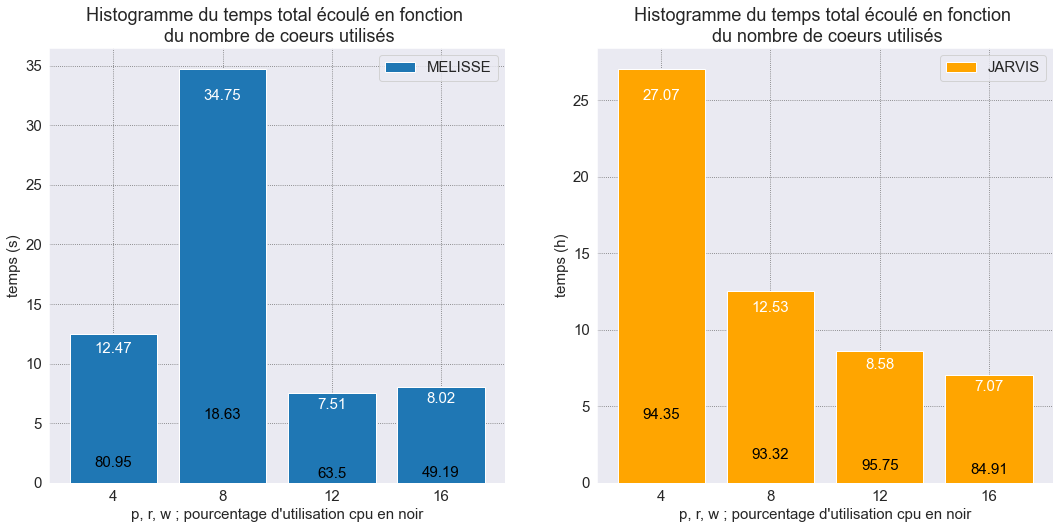

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12", "16"], time_melisse3)
ax[0].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés")
ax[0].set_xlabel("p, r, w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12", "16"], time_jarvis3, color="orange")
ax[1].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés")
ax[1].set_xlabel("p, r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_melisse3, 0.95)
autolabel(bar2, 1, time_jarvis3, 0.95)
autolabel(bar1, 0, list(bcl2fasq3["utilisation cpu (%)"][0:4]), 0.18, col="black")
autolabel(bar2, 1, list(bcl2fasq3["utilisation cpu (%)"][4:]), 0.18, col="black")
plt.savefig("img/temps_total3.png", transparent=False);

#### Temps cpu

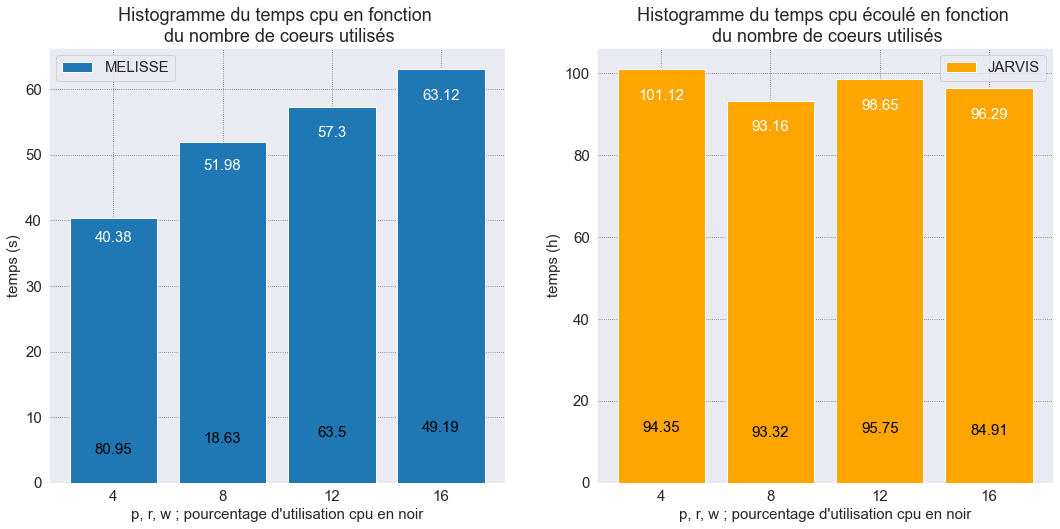

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

time_cpu_m = list(bcl2fasq3["temps cpu"][0:4])
time_cpu_j = np.array(bcl2fasq3["temps cpu"][4:8])/3600

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12", "16"], time_cpu_m)
ax[0].set_title("Histogramme du temps cpu en fonction \n du nombre de coeurs utilisés")
ax[0].set_xlabel("p, r, w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12", "16"], time_cpu_j, color="orange")
ax[1].set_title("Histogramme du temps cpu écoulé en fonction \n du nombre de coeurs utilisés")
ax[1].set_xlabel("p, r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_cpu_m, 0.95)
autolabel(bar2, 1, time_cpu_j, 0.95)
autolabel(bar1, 0, list(bcl2fasq3["utilisation cpu (%)"][0:4]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq3["utilisation cpu (%)"][4:]), 0.15, col="black")
plt.savefig("img/temps_cpu3.png", transparent=False);

---
# Résultatss des varaitions des paramètres `w` et `r` aveec `p` = 8 de bcl2fastq

In [22]:
bcl2fasq4 = pd.read_csv("result4_bcl2fastq.csv")

In [23]:
bcl2fasq4

,type run,param utilisé,temps écoulé (h),temps utilisateur (s),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p8 r2 w2,00:00:36.49,51.24,1.92,18.13,1.872452
1,MELISSE,p8 r4 w4,00:00:07.59,40.22,2.96,71.00,2.361540
2,MELISSE,p8 r6 w6,00:00:08.55,48.33,2.46,74.25,2.346620
3,MELISSE,p8 r8 w8,00:00:34.75,49.85,2.13,18.63,1.869064
4,JARVIS,p8 r2 w2,12:47:34,352009.42,4089.72,96.69,38.152596
5,JARVIS,p8 r4 w4,12:02:06,332492.72,3128.93,96.82,42.052904
6,JARVIS,p8 r6 w6,12:37:44,345529.40,2179.90,97.01,41.412972
7,JARVIS,p8 r8 w8,12:32:04,331063.12,4326.68,93.32,41.013616


In [24]:
bcl2fasq4["temps cpu"] = bcl2fasq4["temps cpu"] + bcl2fasq4["temps utilisateur (s)"]
bcl2fasq4 = bcl2fasq4.drop("temps utilisateur (s)", axis=1)
bcl2fasq4

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p8 r2 w2,00:00:36.49,53.16,18.13,1.872452
1,MELISSE,p8 r4 w4,00:00:07.59,43.18,71.00,2.361540
2,MELISSE,p8 r6 w6,00:00:08.55,50.79,74.25,2.346620
3,MELISSE,p8 r8 w8,00:00:34.75,51.98,18.63,1.869064
4,JARVIS,p8 r2 w2,12:47:34,356099.14,96.69,38.152596
5,JARVIS,p8 r4 w4,12:02:06,335621.65,96.82,42.052904
6,JARVIS,p8 r6 w6,12:37:44,347709.30,97.01,41.412972
7,JARVIS,p8 r8 w8,12:32:04,335389.80,93.32,41.013616


In [25]:
time_melisse4 = [float(bcl2fasq4["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis4 = [bcl2fasq4["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis4 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis4]
time4 = time_melisse4 + time_jarvis4

### Graphique
#### Temps total

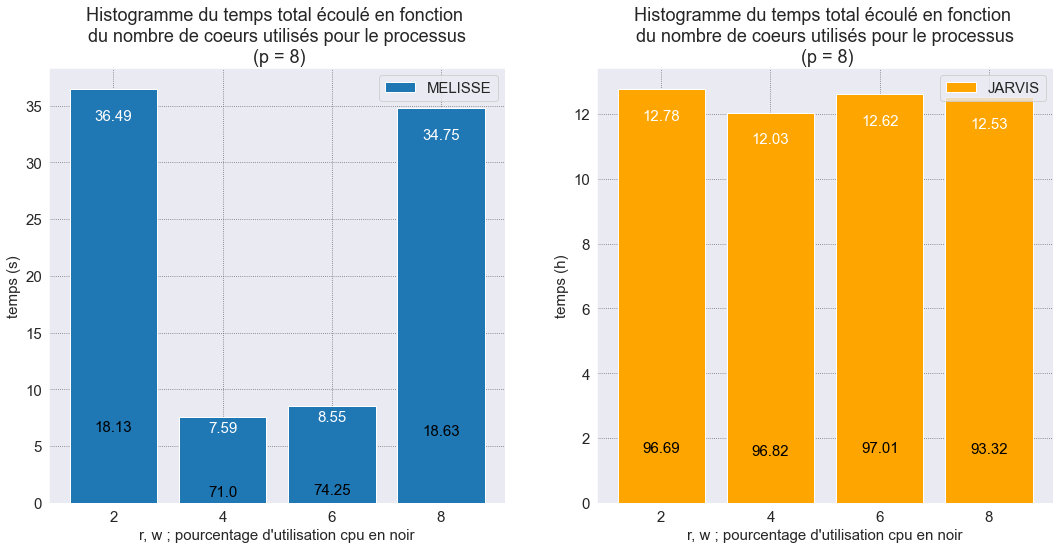

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["2", "4", "6", "8"], time_melisse4)
ax[0].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus \n (p = 8)")
ax[0].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["2", "4", "6", "8"], time_jarvis4, color="orange")
ax[1].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus \n (p = 8)")
ax[1].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_melisse4, 0.95)
autolabel(bar2, 1, time_jarvis4, 0.95)
autolabel(bar1, 0, list(bcl2fasq4["utilisation cpu (%)"][0:4]), 0.2, col="black")
autolabel(bar2, 1, list(bcl2fasq4["utilisation cpu (%)"][4:]), 0.15, col="black")
plt.savefig("img/temps_total4.png", transparent=False);

#### Temps cpu

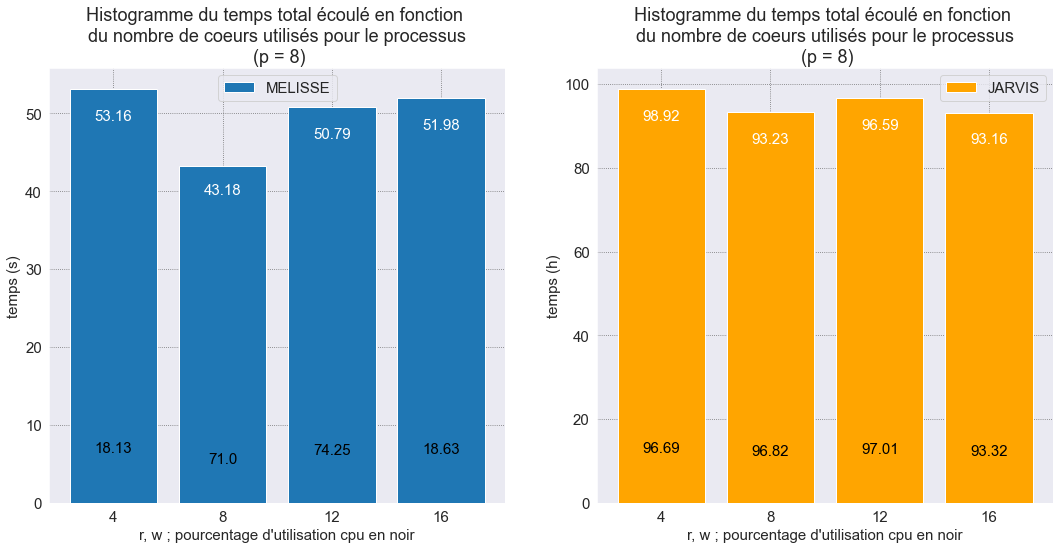

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

time_cpu_m = list(bcl2fasq4["temps cpu"][0:4])
time_cpu_j = np.array(bcl2fasq4["temps cpu"][4:8])/3600

plt.rc("font", size=15)
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
bar1 = ax[0].bar(["4", "8", "12", "16"], time_cpu_m)
ax[0].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus \n (p = 8)")
ax[0].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
bar2 = ax[1].bar(["4", "8", "12", "16"], time_cpu_j, color="orange")
ax[1].set_title("Histogramme du temps total écoulé en fonction \n du nombre de coeurs utilisés pour le processus \n (p = 8)")
ax[1].set_xlabel("r, w ; pourcentage d'utilisation cpu en noir")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
autolabel(bar1, 0, time_cpu_m, 0.95)
autolabel(bar2, 1, time_cpu_j, 0.95)
autolabel(bar1, 0, list(bcl2fasq4["utilisation cpu (%)"][0:4]), 0.15, col="black")
autolabel(bar2, 1, list(bcl2fasq4["utilisation cpu (%)"][4:]), 0.15, col="black")
plt.savefig("img/temps_cpu4.png", transparent=False);

In [28]:
tab_final_jarvis = pd.concat([bcl2fasq[bcl2fasq["type run"] == "JARVIS"], bcl2fasq2[bcl2fasq2["type run"] == "JARVIS"],
           bcl2fasq3[bcl2fasq3["type run"] == "JARVIS"], bcl2fasq4[bcl2fasq4["type run"] == "JARVIS"]],
          axis=0, join="inner")

tab_final_melisse = pd.concat([bcl2fasq[bcl2fasq["type run"] == "MELISSE"], bcl2fasq2[bcl2fasq2["type run"] == "MELISSE"],
           bcl2fasq3[bcl2fasq3["type run"] == "MELISSE"], bcl2fasq4[bcl2fasq4["type run"] == "MELISSE"]],
          axis=0, join="inner")

In [29]:
def conv_time_dtf(times):
    time_conv = []
    for time in times:
        h = int(time/3600)
        if h <10:
            h = f"0{h}"
        m = int(time%3600/60)
        if m < 10:
            m = f"0{m}"
        s = int(time%3600%60)
        if s < 10:
            s = f"0{s}"
        time_conv.append(f"{h}:{m}:{s}")
    return time_conv

In [30]:
tab_final_melisse["temps cpu"] = conv_time_dtf(tab_final_melisse["temps cpu"])
tab_final_melisse = tab_final_melisse.rename(columns={"temps utilisateur (s)": "temps utilisateur (h)",
                                                      "temps cpu": "temps cpu (h)"})
tab_final_melisse

,type run,param utilisé,temps écoulé (h),temps cpu (h),utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4,00:00:12.47,00:00:40,80.95,2.346448
1,MELISSE,p8,00:00:07.59,00:00:43,71.12,2.361540
2,MELISSE,p12,00:00:06.45,00:00:43,55.75,2.386592
3,MELISSE,p16,00:00:11.31,00:01:02,34.56,2.365040
0,MELISSE,r4 w4,00:00:08.58,00:00:57,56.25,2.360844
1,MELISSE,r8 w8,00:00:18.38,00:00:58,26.33,2.354396
2,MELISSE,r12 w12,00:00:07.51,00:00:57,63.50,2.359704
0,MELISSE,p4 r4 w4,00:00:12.47,00:00:40,80.95,2.346448
1,MELISSE,p8 r8 w8,00:00:34.75,00:00:51,18.63,1.869064
2,MELISSE,p12 r12 w12,00:00:07.51,00:00:57,63.50,2.359704


In [31]:
tab_final_melisse.to_csv("tab_final_melisse.csv", index=None)

In [32]:
tab_final_jarvis["temps cpu"] = conv_time_dtf(tab_final_jarvis["temps cpu"])
tab_final_jarvis = tab_final_jarvis.rename(columns={"temps utilisateur (s)": "temps utilisateur (h)",
                                                    "temps cpu": "temps cpu (h)"})
tab_final_jarvis

,type run,param utilisé,temps écoulé (h),temps cpu (h),utilisation cpu (%),mémoire utilisé (Gb)
4,JARVIS,p4,22:23:48,87:53:53,98.00,38.771068
5,JARVIS,p8,12:02:06,93:13:41,96.82,42.052904
6,JARVIS,p12,08:40:15,98:36:51,94.91,45.836560
7,JARVIS,p16,08:49:20,133:45:55,95.30,54.406524
3,JARVIS,r4 w4,08:40:15,98:36:51,94.90,45.836560
4,JARVIS,r8 w8,07:42:28,98:48:14,95.80,49.550256
5,JARVIS,r12 w12,08:36:00,98:38:48,95.75,50.125228
4,JARVIS,p4 r4 w4,27:04:19,101:06:59,94.35,33.040992
5,JARVIS,p8 r8 w8,12:32:08,93:09:49,93.32,41.013616
6,JARVIS,p12 r12 w12,08:35:00,98:38:48,95.75,50.125228


In [33]:
tab_final_jarvis.to_csv("tab_final_jarvis.csv", index=None)